This is the auxiliary code for the 3F8 coursework. Some parts are missing and should be completed by the student. These are Marked with XXX

**Note that your changes will not be saved unless you click the "Copy to Drive" button above!**

In [242]:
# We load the data

import numpy as np

X = np.loadtxt('X.txt')
y = np.loadtxt('y.txt')

# We randomly permute the data

permutation = np.random.permutation(X.shape[ 0 ])
X = X[ permutation, : ]
y = y[ permutation ]

In [243]:
# We plot the data

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)

##
# Function that plots the points in 2D together with their labels
#
# Inputs:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: 2D matrices with the x and y coordinates of the points shown in the plot
#

def plot_data_internal(X, y):
    x_min, x_max = X[ :, 0 ].min() - .5, X[ :, 0 ].max() + .5
    y_min, y_max = X[ :, 1 ].min() - .5, X[ :, 1 ].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    plt.figure()
    plt.xlim(xx.min(None), xx.max(None))
    plt.ylim(yy.min(None), yy.max(None))
    ax = plt.gca()
    ax.plot(X[y == 0, 0], X[y == 0, 1], 'ro', label = 'Class 1')
    ax.plot(X[y == 1, 0], X[y == 1, 1], 'bo', label = 'Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Plot data')
    plt.legend(loc = 'upper left', scatterpoints = 1, numpoints = 1)
    return xx, yy

##
# Function that plots the data without returning anything by calling "plot_data_internal".
#
# Input:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: Nothing.
#

def plot_data(X, y):
    xx, yy = plot_data_internal(X, y)
    plt.show()

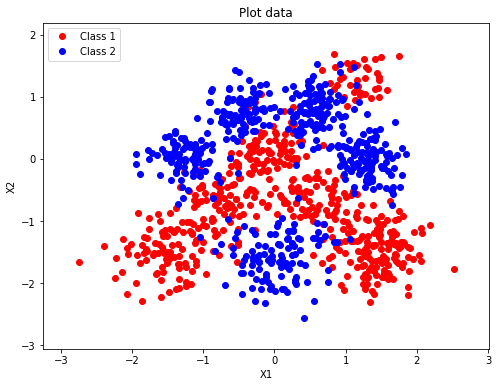

In [244]:
plot_data(X, y)

In [245]:
# We split the data into train and test sets

n_train = 800
X_train = X[ 0 : n_train, : ]
X_test = X[ n_train :, : ]
y_train = y[ 0 : n_train ]
y_test = y[ n_train : ]

In [246]:
# The logistic function

def logistic(x): return 1.0 / (1.0 + np.exp(-x))

##
# Function that makes predictions with a logistic classifier
#
# Input:
#
# X_tile: matrix of input features (with a constant 1 appended to the left) 
#         for which to make predictions
# w: vector of model parameters
#
# Output: The predictions of the logistic classifier
#

def predict(X_tilde, w): return logistic(np.dot(X_tilde, w))

##
# Function that computes the average loglikelihood of the logistic classifier on some data.
#
# Input:
#
# X_tile: matrix of input features (with a constant 1 appended to the left) 
#         for which to make predictions
# y: vector of binary output labels 
# w: vector of model parameters
#
# Output: The average loglikelihood
#

def compute_average_ll(X_tilde, y, w):
    output_prob = predict(X_tilde, w)
    return np.mean(y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))

##
# Function that expands a matrix of input features by adding a column equal to 1.
#
# Input:
#
# X: matrix of input features.
#
# Output: Matrix x_tilde with one additional constant column equal to 1 added.
#

def get_x_tilde(X): return np.concatenate((np.ones((X.shape[ 0 ], 1 )), X), 1)

In [247]:
##
# Function that finds the model parameters by optimising the likelihood using gradient descent
#
# Input:
#
# X_tile_train: matrix of training input features (with a constant 1 appended to the left) 
# y_train: vector of training binary output labels 
# X_tile_test: matrix of test input features (with a constant 1 appended to the left) 
# y_test: vector of test binary output labels 
# alpha: step_size_parameter for the gradient based optimisation
# n_steps: the number of steps of gradient based optimisation
#
# Output: 
# 
# 1 - Vector of model parameters w 
# 2 - Vector with average log-likelihood values obtained on the training set
# 3 - Vector with average log-likelihood values obtained on the test set
#

def fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha):
    w = np.random.randn(X_tilde_train.shape[ 1 ])
    ll_train = np.zeros(n_steps)
    ll_test = np.zeros(n_steps)
    for i in range(n_steps):
        sigmoid_value = predict(X_tilde_train, w)

        dl_dw = np.matmul((y_train - sigmoid_value).T ,X_tilde_train)
        w += alpha*dl_dw # XXX Gradient-based update rule for w. To be completed by the student

        ll_train[ i ] = compute_average_ll(X_tilde_train, y_train, w)
        ll_test[ i ] = compute_average_ll(X_tilde_test, y_test, w)
        print(ll_train[ i ], ll_test[ i ])

    return w, ll_train, ll_test

In [248]:
# We train the classifier

alpha = 0.001# XXX Learning rate for gradient-based optimisation. To be completed by the student
n_steps = 100 # XXX Number of steps of gradient-based optimisation. To be completed by the student

X_tilde_train = get_x_tilde(X_train)
X_tilde_test = get_x_tilde(X_test)
w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)


-0.8771166797381323 -0.8631377302439259
-0.7937171797419558 -0.7821428032082308
-0.7351394713962872 -0.7253474410432028
-0.6962311933616887 -0.6878231604308445
-0.6711125929335833 -0.6637817983413993
-0.6550002258896928 -0.648467824139815
-0.6446174477379845 -0.638635449602648
-0.6378761493140188 -0.632242679991225
-0.6334693598805472 -0.6280337155486729
-0.6305742312491316 -0.6252321997846029
-0.6286659577392445 -0.6233506907269366
-0.6274056060025395 -0.6220778816491271
-0.626572174843294 -0.6212119104048893
-0.6260206268810444 -0.6206202269569552
-0.625655402042414 -0.6202148948560192
-0.6254134023886238 -0.6199370673822436
-0.625252921425067 -0.6197470592547348
-0.6251463816166763 -0.6196179111626843
-0.6250755470696159 -0.6195311757658827
-0.6250283598828261 -0.6194741366978508
-0.6249968473183185 -0.6194379615728589
-0.6249757371124081 -0.6194164683936448
-0.624961541589717 -0.6194052971407976
-0.6249519521639992 -0.6194013502824444
-0.6249454392528849 -0.6194024125461915
-0.6249

In [249]:
##
# Function that plots the average log-likelihood returned by "fit_w"
#
# Input:
#
# ll: vector with log-likelihood values
#
# Output: Nothing
#

def plot_ll(ll):
    plt.figure()
    ax = plt.gca()
    plt.xlim(0, len(ll) + 2)
    plt.ylim(min(ll) - 0.1, max(ll) + 0.1)
    ax.plot(np.arange(1, len(ll) + 1), ll, 'r-')
    plt.xlabel('Steps')
    plt.ylabel('Average log-likelihood')
    plt.title('Plot Average Log-likelihood Curve')
    plt.show()


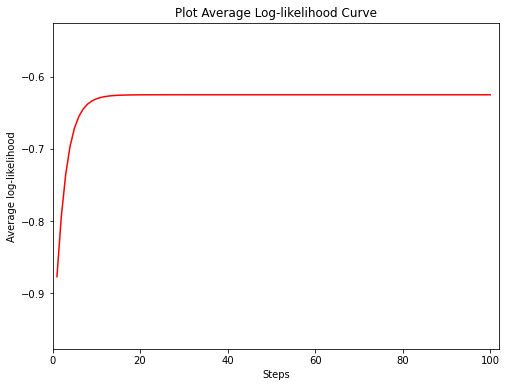

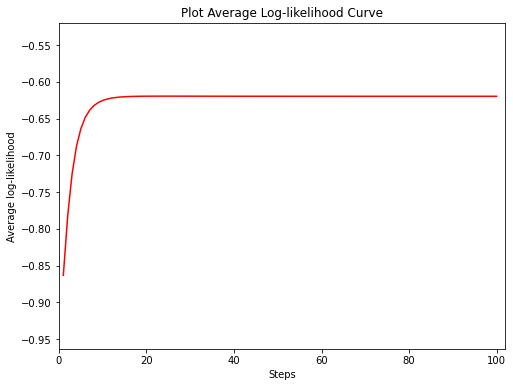

-0.6195746987387946


In [250]:
# We plot the training and test log likelihoods

plot_ll(ll_train)
plot_ll(ll_test)
print(ll_test[99])

In [251]:
##
# Function that plots the predictive probabilities of the logistic classifier
#
# Input:
#
# X: 2d array with the input features for the data (without adding a constant column with ones at the beginning)
# y: 1d array with the class labels (0 or 1) for the data
# w: parameter vector
# map_inputs: function that expands the original 2D inputs using basis functions.
#
# Output: Nothing.
#

def plot_predictive_distribution(X, y, w, map_inputs = lambda x : x):
    xx, yy = plot_data_internal(X, y)
    ax = plt.gca()
    X_tilde = get_x_tilde(map_inputs(np.concatenate((xx.ravel().reshape((-1, 1)), yy.ravel().reshape((-1, 1))), 1)))
    Z = predict(X_tilde, w)
    Z = Z.reshape(xx.shape)
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 4)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    plt.show()


# Confusion Matrix
from sklearn import metrics

def conf_matrix(y_true, y_pred):
    y_pred = np.where(y_pred > 0.5, 1, 0)
    confusion_matrix = metrics.confusion_matrix(y_true, y_pred, normalize='true')
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
    cm_display.plot()
    plt.show()
    return

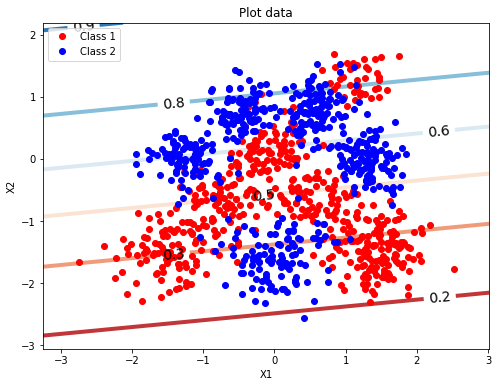

In [252]:
# We plot the predictive distribution

plot_predictive_distribution(X, y, w)

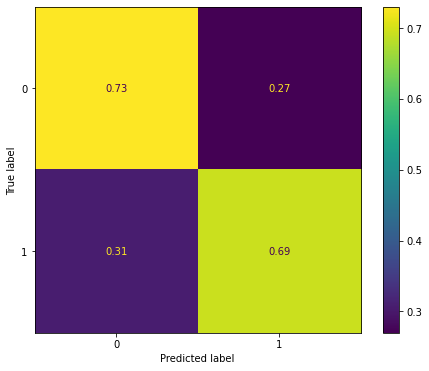

In [253]:
conf_matrix(y_test, predict(X_tilde_test,w))

In [254]:
##
# Function that replaces initial input features by evaluating Gaussian basis functions
# on a grid of points
#
# Inputs:
#
# l: hyper-parameter for the width of the Gaussian basis functions
# Z: location of the Gaussian basis functions
# X: points at which to evaluate the basis functions
#
# Output: Feature matrix with the evaluations of the Gaussian basis functions.
#
print(np.sum([[1,2],[3,4]],1))

def evaluate_basis_functions(l, X, Z):
    X2 = np.sum(X**2, 1)
    Z2 = np.sum(Z**2, 1)
    ones_Z = np.ones(Z.shape[ 0 ])
    ones_X = np.ones(X.shape[ 0 ])
    r2 = np.outer(X2, ones_Z) - 2 * np.dot(X, Z.T) + np.outer(ones_X, Z2)
    return np.exp(-0.5 / l**2 * r2)

[3 7]


-0.9580282066780854 -0.9713001870498769
-0.9009820472377976 -0.9013736648177937
-0.8547012221057534 -0.8556822853075178
-0.8128108169891748 -0.8179746991635182
-0.7746769286772327 -0.7846983849615493
-0.7401169339522923 -0.7548453650721134
-0.7089224367947403 -0.7279862740998208
-0.6808255529871257 -0.7038025580593927
-0.6555159425293968 -0.6819815567364459
-0.6326684768612135 -0.6622125073370932
-0.6119688992194812 -0.6442049793449405
-0.5931310800422397 -0.6277037216881152
-0.5759049974373788 -0.6124941070144614
-0.5600777511450427 -0.5984002586711763
-0.5454705791862092 -0.585279554147058
-0.5319342023510576 -0.5730162575335345
-0.5193439084557123 -0.5615157084933325
-0.5075950682925988 -0.5506995653833046
-0.4965993319964321 -0.5405021207584674
-0.4862815257556145 -0.5308675229819941
-0.4765771712067282 -0.52174770160287
-0.4674305211963922 -0.5131008171465676
-0.4587930083995401 -0.5048900943531135
-0.4506220177983111 -0.497082934183247
-0.4428799109494953 -0.4896502289512503
-0.4

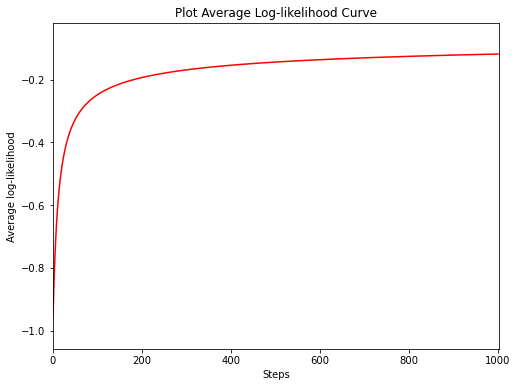

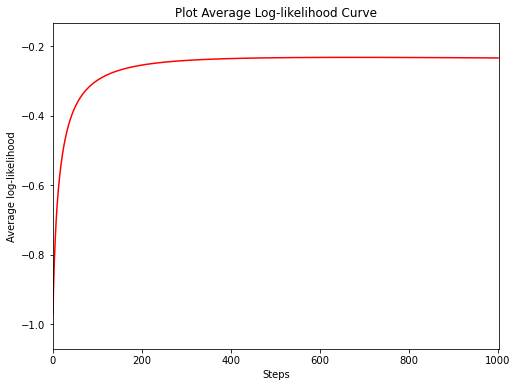

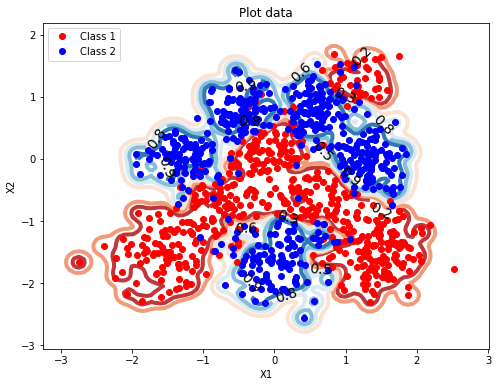

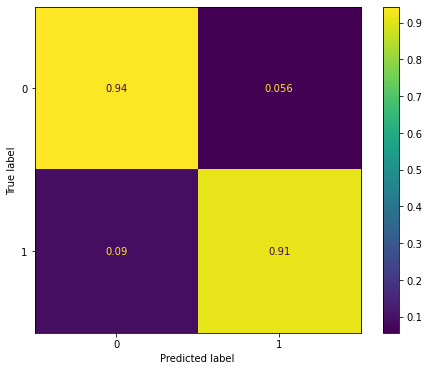

-0.11822370360857079
-0.2340330488327287


In [255]:
# We expand the data

l = 0.1 # XXX Width of the Gaussian basis funcction. To be completed by the student

X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))

# We train the new classifier on the feature expanded inputs

alpha = 0.005 # XXX Learning rate for gradient-based optimisation with basis functions. To be completed by the student 0.0001, 0.002, 0.00003
n_steps = 1000 # XXX Number of steps of gradient-based optimisation with basis functions. To be completed by the student 

w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

plot_ll(ll_train)
plot_ll(ll_test)

# We plot the predictive distribution

plot_predictive_distribution(X, y, w, lambda x : evaluate_basis_functions(l, x, X_train))
conf_matrix(y_test, predict(X_tilde_test,w))

print(ll_train[999])
print(ll_test[999])

-0.988266841944658 -1.0347262432202622
-0.8299589070910082 -0.8194331556311298
-0.803763855126295 -0.7814062778075709
-0.785721512941398 -0.7612858743860229
-0.7688436657269377 -0.7448050470585741
-0.752682021076165 -0.7295968019644385
-0.7371806105273112 -0.7151298186148674
-0.7223082978729676 -0.7012636912254138
-0.7080388516630645 -0.6879486353571664
-0.6943492534866258 -0.6751566094272137
-0.681218835098569 -0.6628658572111793
-0.6686285827076257 -0.6510573502146713
-0.6565605980081266 -0.6397137147000845
-0.6449977003035542 -0.6288187010976243
-0.6339231472345115 -0.618356830016187
-0.6233204509780773 -0.6083131423267782
-0.6131732685573246 -0.5986730285978186
-0.6034653476729394 -0.5894221208458856
-0.5941805125516552 -0.5805462320577836
-0.5853026773077252 -0.5720313310609516
-0.5768158770254209 -0.563863542434967
-0.5687043091020396 -0.556029163157997
-0.5609523793242992 -0.5485146894789462
-0.5535447487095174 -0.54130684905817
-0.5464663783697304 -0.5343926347201879
-0.5397025

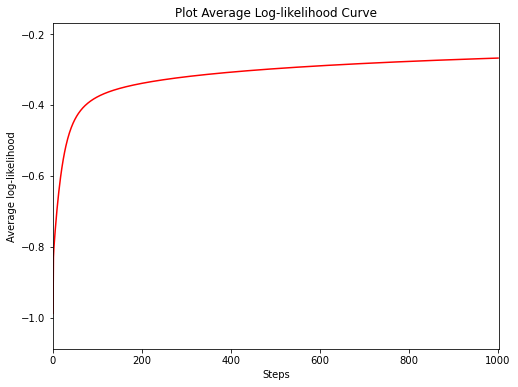

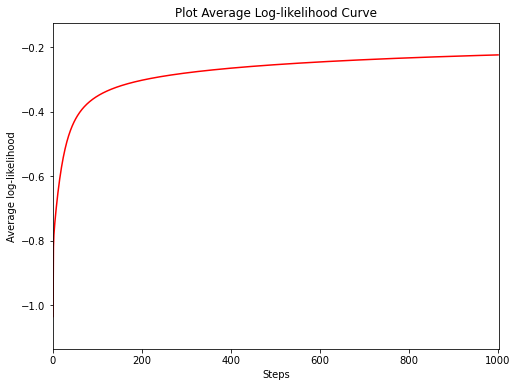

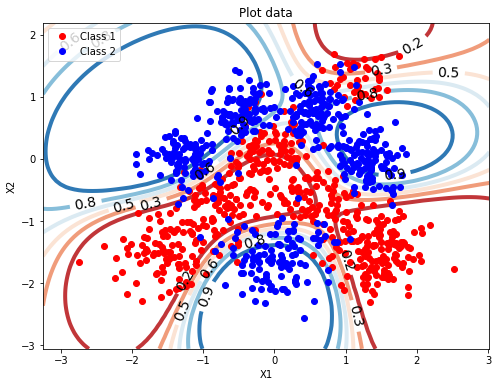

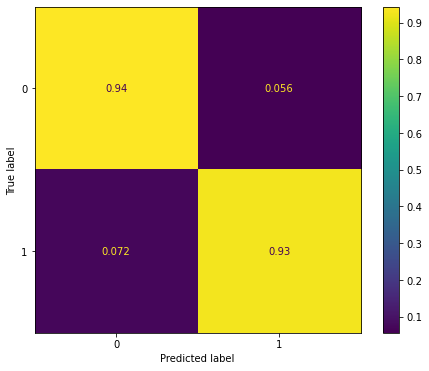

-0.2679950807776372
-0.2235463000595295


In [256]:
# We expand the data

l = 1 # XXX Width of the Gaussian basis funcction. To be completed by the student

X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))

# We train the new classifier on the feature expanded inputs

alpha = 0.0001 # XXX Learning rate for gradient-based optimisation with basis functions. To be completed by the student 0.0001, 0.002, 0.00003
n_steps = 1000 # XXX Number of steps of gradient-based optimisation with basis functions. To be completed by the student 

w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

plot_ll(ll_train)
plot_ll(ll_test)

# We plot the predictive distribution

plot_predictive_distribution(X, y, w, lambda x : evaluate_basis_functions(l, x, X_train))
conf_matrix(y_test, predict(X_tilde_test,w))

print(ll_train[999])
print(ll_test[999])

-0.8359589858015538 -0.7052920795488007
-0.8050984064577189 -0.7608606616696629
-0.7909768846862159 -0.6917707772398362
-0.7837694603704455 -0.7221348825483163
-0.7789198972950457 -0.6969808351491729
-0.7751227903114599 -0.7108872885823331
-0.771749070626576 -0.7007240458302643
-0.7685685621281964 -0.7067980933157769
-0.7654767431529441 -0.7024972847936186
-0.7624317306606297 -0.7050846132695505
-0.7594150960499688 -0.7031996226837413
-0.7564191291851375 -0.7042689146033652
-0.7534404538471381 -0.7034044793986604
-0.7504775992953654 -0.7038169345156168
-0.7475298957507661 -0.7033897669160748
-0.7445970191483358 -0.703518053671049
-0.7416787945262354 -0.7032801525716147
-0.7387751102620967 -0.703285330295004
-0.7358858827668794 -0.7031301488010265
-0.7330110399803627 -0.7030820028708331
-0.7301505151277397 -0.7029634202766701
-0.727304243409877 -0.7028923102876067
-0.7244721609760864 -0.7027902382281116
-0.7216542042141019 -0.7027094311246234
-0.718850309625706 -0.7026150709100257
-0.71

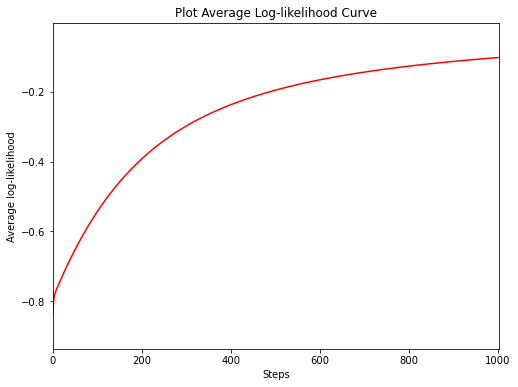

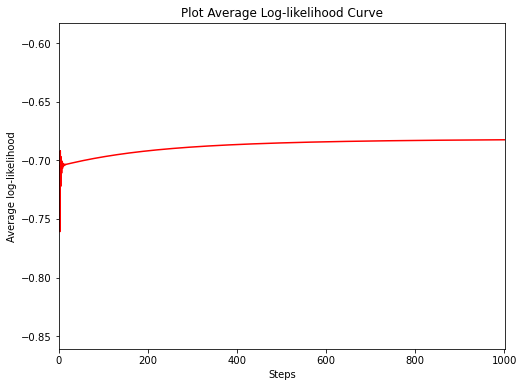

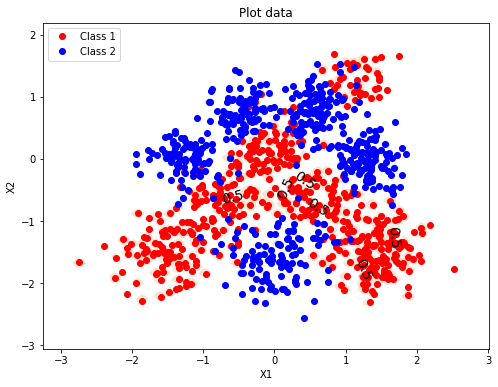

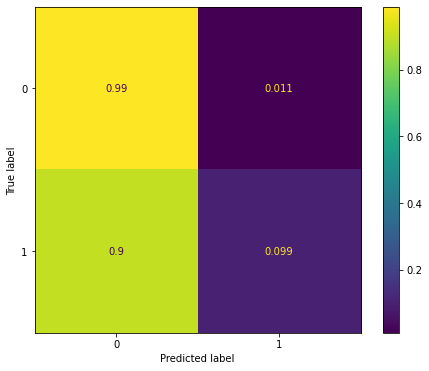

-0.1024842792724731
-0.6824258504710778


In [258]:
l = 0.01 # XXX Width of the Gaussian basis funcction. To be completed by the student

X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))

# We train the new classifier on the feature expanded inputs

alpha = 0.01 # XXX Learning rate for gradient-based optimisation with basis functions. To be completed by the student 0.0001, 0.002, 0.00003
n_steps = 1000 # XXX Number of steps of gradient-based optimisation with basis functions. To be completed by the student 

w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

plot_ll(ll_train)
plot_ll(ll_test)

# We plot the predictive distribution

plot_predictive_distribution(X, y, w, lambda x : evaluate_basis_functions(l, x, X_train))
conf_matrix(y_test, predict(X_tilde_test,w))

print(ll_train[999])
print(ll_test[999])